In [2]:
%matplotlib inline
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('market_data.csv').drop(columns=['Unnamed: 0', 'Time'])

In [4]:
min_diff, max_diff = [], []
for column in data:
    first, second = data.loc[:60, column], data.loc[60:, column]
    min_diff.append(first.min() - second.min())
    max_diff.append(first.max() - second.max())
    
    

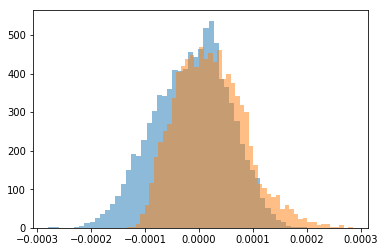

In [5]:
plt.hist(min_diff, bins=50, alpha=.5);
plt.hist(max_diff, bins=50, alpha=.5);

In [6]:
min_gap, max_gap = np.std(min_diff), np.std(max_diff)

print '2 std min = {:.5f}\n2 std max = {:.5f}'.format(np.std(min_diff)*2, np.std(max_diff)*2)

2 std min = 0.00014
2 std max = 0.00013


In [19]:
cost_function = []
for n in np.linspace(.01, 1, 20):
    trade = np.zeros((data.shape[1], 2), dtype=float)
    for i, column in enumerate(data):
        first_mean, first_std = data.loc[:60, column].mean(), data.loc[60:, column].std()
        min_achieved = False
        for val in data.loc[60:, column]:
            if val < first_mean - n * first_std:
                trade[i, 0] = val
                min_achieved = True
            if min_achieved and val > first_mean + n * first_std:
                trade[i, 1] = val

                break

    cost_function_n = np.sum(trade[:, 1] - trade[:, 0])
    cost_function.append(cost_function_n)
    print 'We have earned {:.3f} with gap parameter = {:.2f}'.format(cost_function_n, n)            

We have earned 0.390 with gap parameter = 0.01
We have earned 0.415 with gap parameter = 0.06
We have earned 0.438 with gap parameter = 0.11
We have earned 0.458 with gap parameter = 0.17
We have earned 0.475 with gap parameter = 0.22
We have earned 0.487 with gap parameter = 0.27
We have earned 0.495 with gap parameter = 0.32
We have earned 0.495 with gap parameter = 0.37
We have earned 0.480 with gap parameter = 0.43
We have earned 0.469 with gap parameter = 0.48
We have earned 0.446 with gap parameter = 0.53
We have earned 0.416 with gap parameter = 0.58
We have earned 0.374 with gap parameter = 0.64
We have earned 0.344 with gap parameter = 0.69
We have earned 0.299 with gap parameter = 0.74
We have earned 0.257 with gap parameter = 0.79
We have earned 0.211 with gap parameter = 0.84
We have earned 0.166 with gap parameter = 0.90
We have earned 0.109 with gap parameter = 0.95
We have earned 0.058 with gap parameter = 1.00


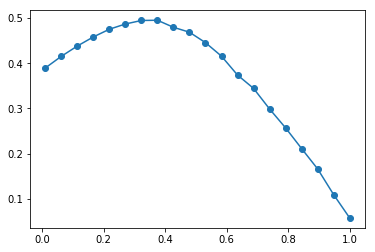

In [22]:
plt.plot(np.linspace(.01, 1, 20), cost_function, marker='o');

### Let's calculate the Upper Bound of the revenue

First - Naive calculation

In [148]:
naive_upper_bound = np.sum(np.max(data.values[60:, :], axis=0) - np.min(data.values[60:, :], axis=0))
print 'naive upper bound = {:.2f}'.format(naive_upper_bound)

naive upper bound = 3.91


The more realistic calculation:

(Considering, that minimum should appear before maximum)

In [147]:
real_upper_bound = np.sum(max_diff(data.values[60:, col]) for col in range(data.values.shape[1]))
print 'real upper bound = {:.2f}'.format(real_upper_bound)

real upper bound = 2.57


In [79]:
np.sum(trade[:, 1] - trade[:, 0])

0.106410487

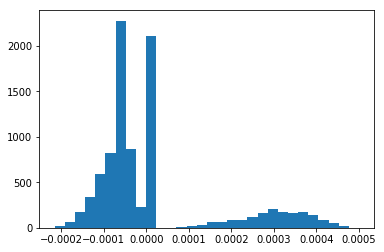

In [78]:
plt.hist(trade[:, 1] - trade[:, 0], bins=30);

In [131]:
!mv max_diff.png img/


<img src="img/max_diff.png",width=400,height=400>

In [149]:
def max_diff(arr):
    
    """returns max difference in list, such that
    mininmum appears before maximum"""
    
    max_diff = arr[1] - arr[0]
    min_element = arr[0]
    for val in arr:
        if val - min_element > max_diff:
            max_diff = val - min_element
        if val < min_element:
            min_element = val
    return max_diff

In [143]:
max_diff([9, 1, 2, 4, 10, -10, 2])

12